In [21]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

plt.rcParams["font.size"] = 35

output_dir = "../ipynb/output/"
target_data = "trg_unl-MF0003"
# project = "st1_pretrained_03_G144_all"
# project = "st1_pretrained_03_G293_all"
# project = "st1_pretrained_03_G109-1_all"
project = "s_MF0012_all"

# classes = [0, 1, 2]
classes = ["Non-\nNeop.", "HSIL", "LSIL"]
save = True
dpi = 300

cm_03_G144 = np.array(
    [[249170, 21391, 13184],
    [  5420, 25752,  8708],
    [   847,   783,  2605]]
)

cm_03_G293 = np.array(
    [[271622,  7924,  4199],
    [ 17561, 18588,  3731],
    [  2773,   497,   965]]
)

cm_03_G109_1 = np.array(
    [[233221, 24145, 26379],
    [  6053, 29051,  4776],
    [   773,  1473,  1989]]
)

cm_s = np.array(
    [[232092, 19877, 31776],
    [  6947, 22354, 10579],
    [   560,   800,  2875]]
)

cm = cm_s

In [22]:
# 軸入れ替え
cm = cm[:, [0, 2, 1]]
cm = cm[[0, 2, 1], :]
classes = ["Non-\nNeop.", "LSIL", "HSIL"]

In [23]:
def plot_confusion_matrix(cm, class_names, normalize=True):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    https://towardsdatascience.com/exploring-confusion-matrix-evolution-on-tensorboard-e66b39f4ac12
    """

    figure = plt.figure(figsize=(8, 8))
    # Normalize the confusion matrix.
    if normalize:
        cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
#     plt.title("Confusion matrix")
#     plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    return figure


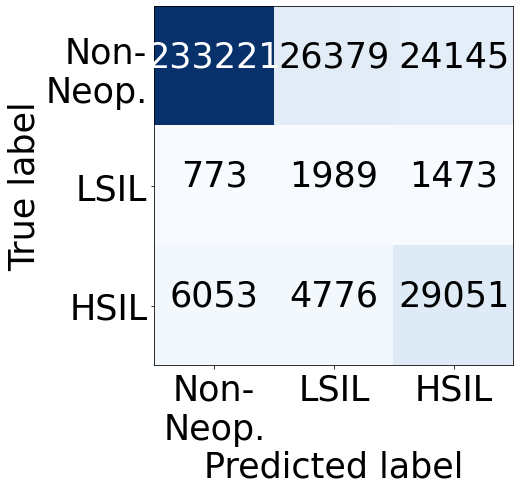

In [24]:
# Not-Normalized
cm_plt = plot_confusion_matrix(
    cm, classes, normalize=False)
if save:
    cm_plt.savefig(
        output_dir
        + project
        + "_"
        + target_data
        + "_nn-confmatrix.png",
        dpi=dpi
    )
# plt.clf()
# plt.close()

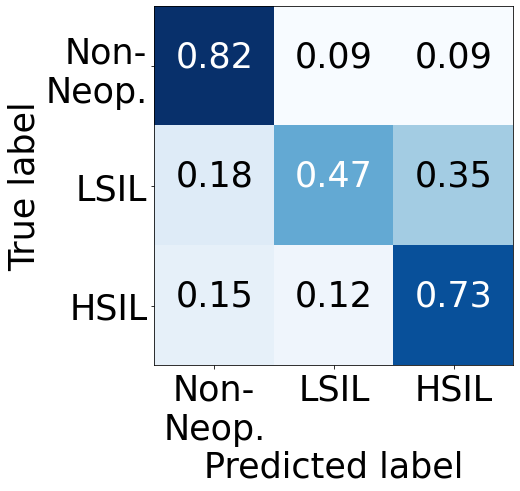

In [25]:
# Normalized
cm_plt = plot_confusion_matrix(
    cm, classes, normalize=True)
if save:
    cm_plt.savefig(
        output_dir
        + project
        + "_"
        + target_data
        + "_confmatrix.png",
        dpi=dpi
    )
# plt.clf()
# plt.close()